In [1]:
import numpy as np
import pandas as pd

In [2]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## pandas의 plot으로 데이터 시각화

**pandas의 그래프기능 : matplotlib.pyplot 기반으로 만들어짐**

https://pandas.pydata.org/docs/user_guide/visualization.html

#### 형식1.
- Series_data.plot([kind='graph_kind'][, option])


- DataFrame_data.plot([x=label 혹은 position, y=label 혹은 position,] [kind='graph_kind'][, option])



- kind 옵션
    - line : 선그래프
    - scatter : 산점도(데이터프레임에서만 가능)
    - bar : 수직막대그래프
    - barh : 수평막대그래프
    - hist : 히스토그램
    - pie : 파이그래프
    - box : 박스 플롯
    - area : area 플롯
    - density : Kernel Density Estimation 플롯
    - kde : Kernel Density Estimation 플롯

#### 형식2.


- 수직막대그래프
    - Series_data.plot.bar([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.bar([x=label 혹은 position, y=label 혹은 position][, option])


- 수평막대그래프
    - Series_data.plot.barh([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.barh([x=label 혹은 position, y=label 혹은 position][, option])
    
    
- 파이그래프
    - Series_data.plot.pie([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.pie([x=label 혹은 position, y=label 혹은 position][, option])
    

- 선그래프
    - Series_data.plot.line([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.line([x=label 혹은 position, y=label 혹은 position][, option])


- 히스토그램
    - Series_data.plot.hist([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.hist([x=label 혹은 position, y=label 혹은 position][, option])
  

- 박스플롯
    - Series_data.plot.box([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.box([x=label 혹은 position, y=label 혹은 position][, option])
     

- 산점도
    - DataFrame_data.plot.scatter([x=label 혹은 position, y=label 혹은 position][, option])
    
    
- 커널밀도추정곡선(Kernel Density Estimation)
    - Series_data.plot.kde([x=label 혹은 position, y=label 혹은 position][, option])
    - Series_data.plot.density([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.kde([x=label 혹은 position, y=label 혹은 position][, option])
    - DataFrame_data.plot.density([x=label 혹은 position, y=label 혹은 position][, option])

## 1. 범주형 데이터 시각화

- 막대그래프, 파이그래프

#### 예. 타이타닉 데이터

In [3]:
df = pd.read_csv('data/titanic.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1) 막대그래프(bar)

#### 타이타닉호 승객의 사망/생존 빈도

In [10]:
surv = df.Survived.value_counts()
surv

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

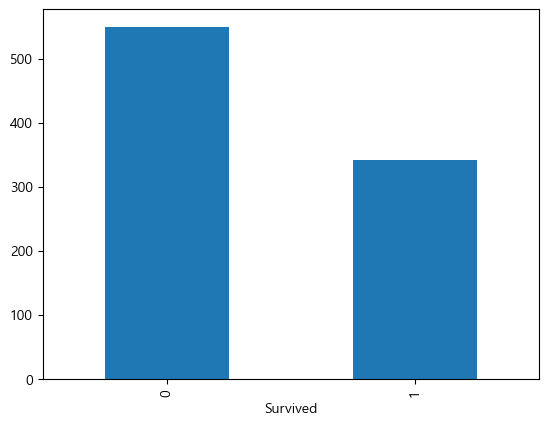

In [13]:
surv.plot.bar()

In [16]:
surv.index= ['사망','생존']
surv

사망    549
생존    342
Name: count, dtype: int64

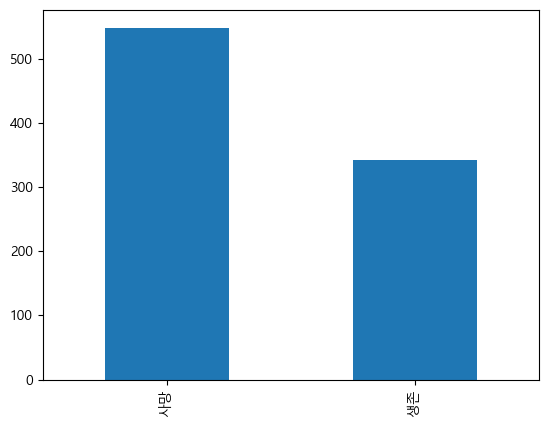

In [18]:
surv.plot.bar()
plt.show()

#### 타이타닉호 승객의 성별에 따른 사망/생존 

In [39]:
ssurv = df[['Sex','Survived']].value_counts(sort=False)
ssurv

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: count, dtype: int64

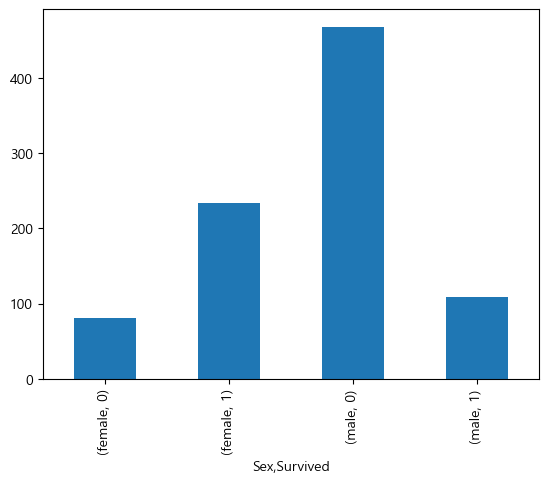

In [27]:
ssurv.plot.bar()
plt.show()

In [28]:
ssurv.index

MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])

In [ ]:
ssurv.unstack()
ssurv.rename({0:'사망',1:'생존'}, inplace= True)

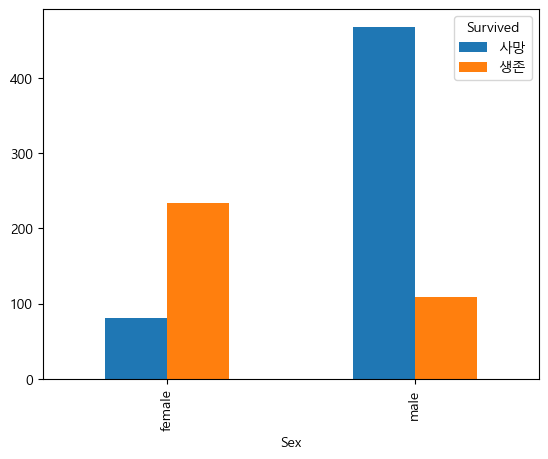

In [52]:
ssurv.unstack().plot.bar()
plt.show()

In [57]:
df2=pd.DataFrame(np.random.randint(10, size=(10,4)), columns='a b c d'.split())
df2

,a,b,c,d
0,7,5,4,0
1,9,0,6,2
2,2,8,4,5
3,2,5,0,5
4,3,7,4,9
5,1,3,9,2
6,2,6,1,1
7,2,5,4,3
8,8,9,5,5
9,7,0,3,9


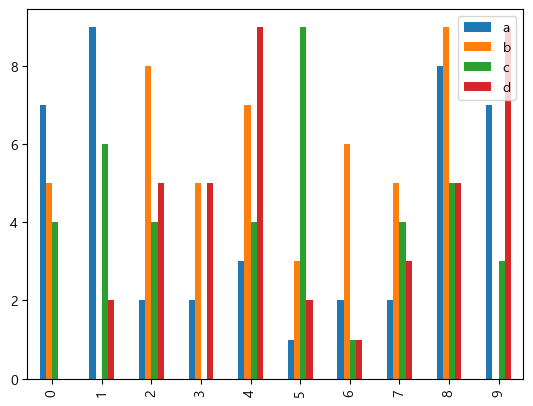

In [63]:
df2.plot.bar()
plt.show()

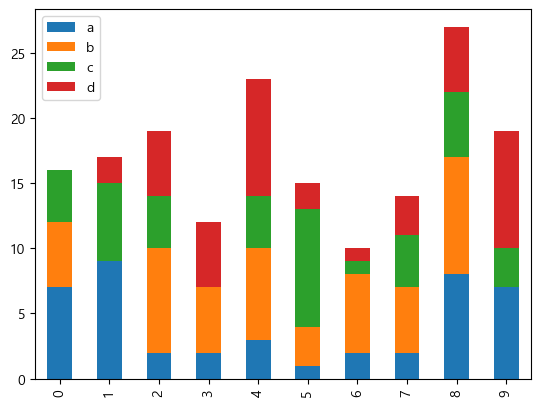

In [64]:
df2.plot.bar(stacked=True)
plt.show()

### 2) 파이그래프(pie)

**타이타닉호 승객의 사망/생존 비율**

In [65]:
surv

사망    549
생존    342
Name: count, dtype: int64

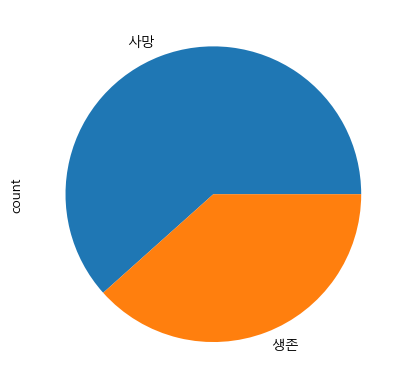

In [66]:
surv.plot.pie()
plt.show()

In [67]:
df3 = pd.Series(np.random.randint(10, size=(4,)), index='a b c d'.split())
df3.name = 'Series cnt'
df3

a    7
b    8
c    7
d    2
Name: Series cnt, dtype: int32

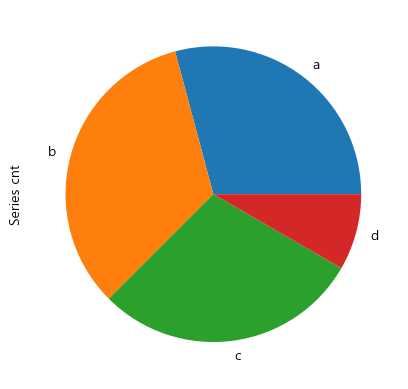

In [69]:
df3.plot.pie()
plt.show()

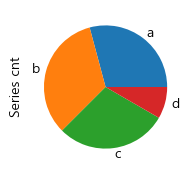

In [71]:
df3.plot.pie(figsize=(3,2))
plt.show()

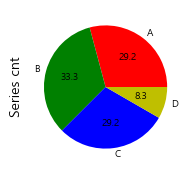

In [76]:
df3.plot.pie(figsize=(3,2), labels='A B C D'.split(),
             colors=['r','g','b','y'],autopct='%.1f', fontsize=7)
plt.show()

In [77]:
df4 = pd.DataFrame(np.random.randint(10, size=(4,2)),index='a b c d'.split(),
                  columns=['X','Y'])
df4

,X,Y
a,4,2
b,2,2
c,4,7
d,5,6


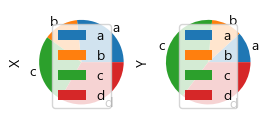

In [80]:
df4.plot.pie(figsize=(3,2),subplots=True)
plt.show()

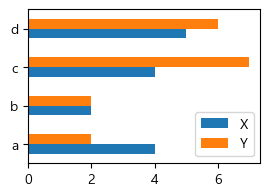

In [81]:
df4.plot.barh(figsize=(3,2))
plt.show()

## 2. 수치형 데이터 시각화

- 선그래프, 히스토그램, 박스플롯, 산점도

### 1) 히스토그램(histogram)

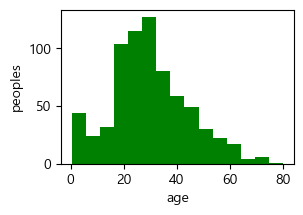

In [90]:
df.Age.plot.hist(figsize=(3,2),color='g',bins=15,xlabel='age',ylabel='peoples')
plt.show()

In [5]:
df5 = pd.DataFrame({'A': np.random.randn(1000)+1,
                    'B': np.random.randn(1000),
                    'C': np.random.randn(1000)-1})
df5

,A,B,C
0,1.587839,0.376711,-0.310418
1,-0.023924,-0.361116,-2.757552
2,3.049348,0.698464,0.419703
3,0.394431,-1.133028,-2.365593
4,0.108940,-1.620097,0.453820
...,...,...,...
995,2.454516,1.430288,-1.366693
996,-1.812027,-0.530182,-0.128055
997,1.329310,-0.274584,0.738840
998,1.257610,0.470092,-0.714879


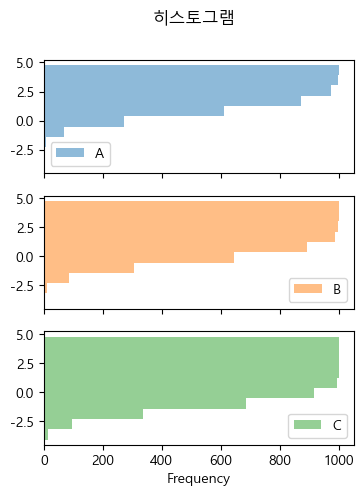

In [9]:
df5.plot.hist(figsize=(4,5), alpha=0.5,stacked=True,
              orientation='horizontal', cumulative=True, subplots=True
             ,title='히스토그램')
plt.show()

### 2) 박스플롯(box-plot)

outlier(min과 max를 넘어가는 위치에 있는 값) / min(Q1에서 1.5 IQR1을 뺀 위치) / Q1, Q2(median), Q3 / max(Q3에서 1.5 IQR을 더한 위치) / outlier

In [102]:
df.Age.skew()

0.38910778230082704

In [13]:
pd.Series(np.random.randn(3000)).skew()

0.012627708900211526

In [14]:
df.Age.kurt()

0.17827415364210353

In [15]:
pd.Series(np.random.randn(3000)).kurt()

0.1985352746871234

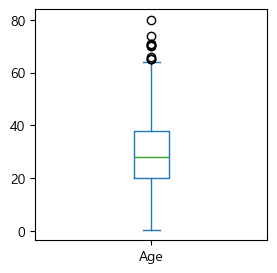

In [19]:
df.Age.plot.box(figsize=(3,3))
plt.show()

In [20]:
df2 = pd.DataFrame(np.random.rand(10,5), columns='A B C D E'.split())
df2

,A,B,C,D,E
0,0.119842,0.377751,0.811485,0.542721,0.651173
1,0.473620,0.954750,0.372675,0.516654,0.342365
2,0.115177,0.417281,0.826106,0.880166,0.894335
3,0.014347,0.608016,0.444722,0.010455,0.711326
4,0.511474,0.386596,0.845864,0.486818,0.836424
5,0.157493,0.736289,0.753151,0.635700,0.974642
6,0.850840,0.431986,0.896124,0.053051,0.246290
7,0.638556,0.413872,0.183392,0.054570,0.407629
8,0.033737,0.011746,0.309776,0.637410,0.746347
9,0.530065,0.206752,0.984524,0.617862,0.906386


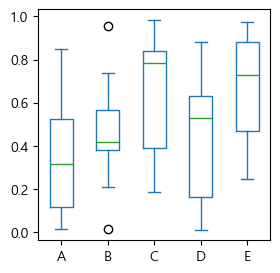

In [21]:
df2.plot.box(figsize=(3,3))
plt.show()

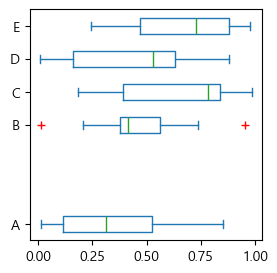

In [28]:
df2.plot.box(figsize=(3,3),
             sym='r+', vert=False, positions=[1,4,5,6,7])
plt.show()

### 3) 선그래프(line)

**선 그래프는 시간별 추이,변화량을 비교할 때 사용**

In [34]:
df3 = pd.DataFrame({'경유':[2100,2050,2000,2010,2150,2090],
                   '휘발유':[1900,1950,1800,1955,1970,1920]},
                  index=['1월', '2월', '3월', '4월', '5월', '6월'])
df3

,경유,휘발유
1월,2100,1900
2월,2050,1950
3월,2000,1800
4월,2010,1955
5월,2150,1970
6월,2090,1920


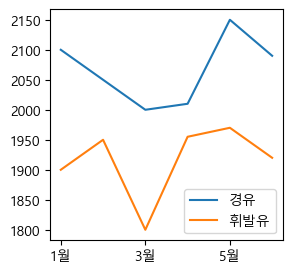

In [35]:
df3.plot(figsize=(3,3))
plt.show()

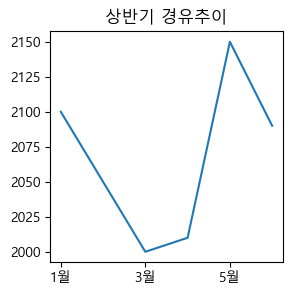

In [37]:
df3['경유'].plot(figsize=(3,3), title='상반기 경유추이')
plt.show()

### 4) 산점도(scatterplot)

**산점도(scatter plot) : 두 변수간의 상관성**

In [40]:
df4 = pd.DataFrame({'height':[165,177,180,193,155,162,170],
                   'weight':[62,67,55,74,90,49,64]})
df4

,height,weight
0,165,62
1,177,67
2,180,55
3,193,74
4,155,90
5,162,49
6,170,64


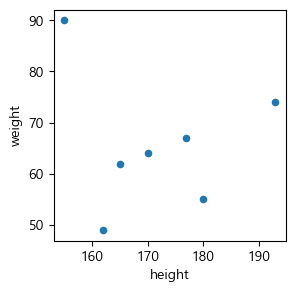

In [42]:
df4.plot.scatter(x='height',y='weight',figsize=(3,3))
plt.show()

In [43]:
df4.corr()

,height,weight
height,1.000000,-0.118915
weight,-0.118915,1.000000


In [44]:
df5= pd.DataFrame(np.random.rand(50,4),
                 columns='A B C D'.split())

In [45]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


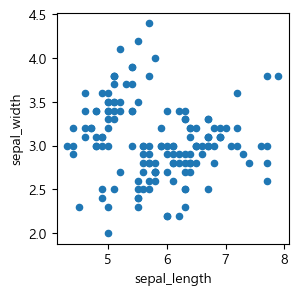

In [48]:
iris.plot.scatter(x='sepal_length', y='sepal_width', figsize=(3,3))
plt.show()

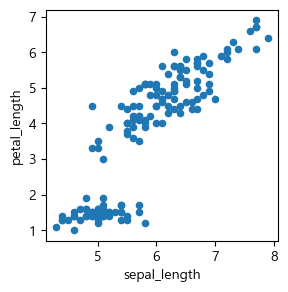

In [49]:
iris.plot.scatter(x='sepal_length', y='petal_length', figsize=(3,3))
plt.show()

In [52]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [53]:
iris.species=iris.species.astype('category')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [68]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

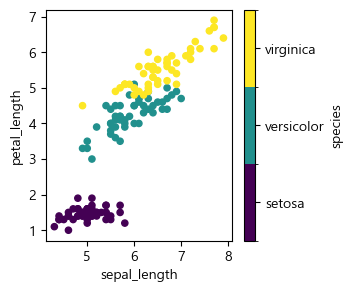

In [59]:
iris.plot.scatter(x='sepal_length', y='petal_length',
                 c='species', figsize=(3,3),cmap='viridis')
plt.show()

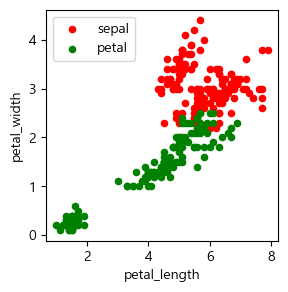

In [71]:
# 여러개의 plot을 그릴 수 있다.
ax = iris.plot.scatter(x='sepal_length',y='sepal_width', figsize=(3,3),color='red',label='sepal')
iris.plot.scatter(x='petal_length',y='petal_width',color='green', label='petal', ax=ax)
plt.show()

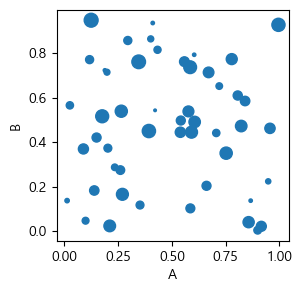

In [74]:
df5['size'] = df5['C']*100
df5.plot.scatter(x='A',y='B', s='size', figsize=(3,3))
plt.show()

### 5) 산점도 행렬(scatterplot matrix)

In [76]:
iris.iloc[:,:-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [78]:
from pandas.plotting import scatter_matrix

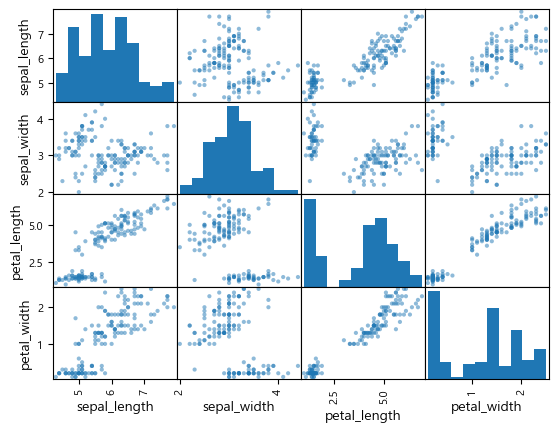

In [81]:
scatter_matrix(iris.iloc[:,:-1])
plt.show()

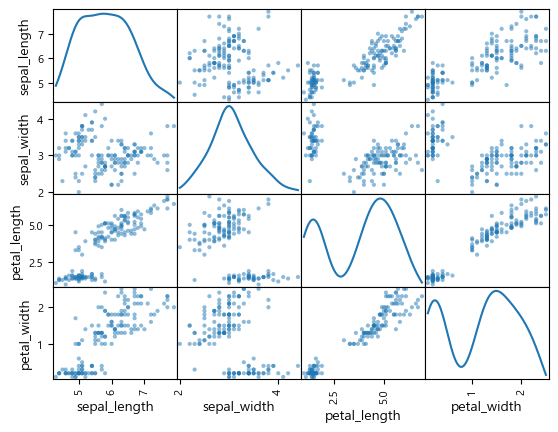

In [80]:
scatter_matrix(iris.iloc[:,:-1],diagonal='kde')
plt.show()

### 6) 밀도함수(density plot)

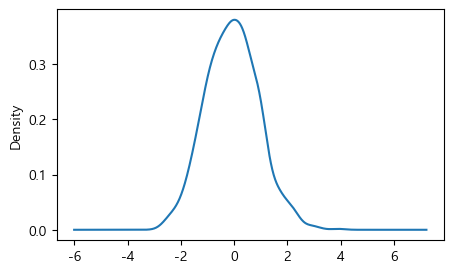

In [84]:
s = pd.Series(np.random.randn(1000))
s.plot.kde(figsize=(5,3))
plt.show()

### 7) 평행좌표 plot(parallel coordinates plot)

In [85]:
from pandas.plotting import parallel_coordinates

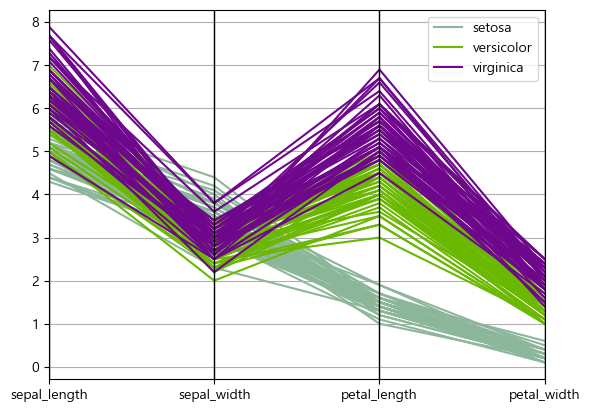

In [89]:
parallel_coordinates(iris, 'species')
plt.show()

-------------